<a href="https://colab.research.google.com/github/zd2011/foundML/blob/main/proj2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing data as dataframe
df_raw = pd.read_csv('/content/gdrive/MyDrive/DS/ML/techSalaries2017.csv')
df_raw.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [ ]:
len(df_raw)

62642

In [ ]:
df = df_raw.drop(columns = ['company', 'title', 'location',
 'basesalary', 'stockgrantvalue', 'bonus'])
df.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,127000,1.5,1.5,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,100000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,310000,8.0,0.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,372000,7.0,5.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,157000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


In [ ]:
#list of column names
df_column = list(df.columns)

#check for null values in each column
for i in df_column:
  if df[i].isnull().sum() > 0:
    print('attribute {} has {} null values'.format(i, df[i].isnull().sum()))

attribute gender has 19540 null values
attribute Race has 40215 null values
attribute Education has 32272 null values


In [ ]:
#median split of annual earning
df["income_level"] = (df.totalyearlycompensation<df.totalyearlycompensation.quantile()).replace({True:0, False:1})
df.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA,income_level
0,127000,1.5,1.5,NaN,0,0,0,0,0,0,...,0,0,NaN,NaN,38,68.590,5,829,2.13,0
1,100000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,NaN,NaN,34,68.059,7,993,2.77,0
2,310000,8.0,0.0,NaN,0,0,0,0,0,0,...,0,0,NaN,NaN,42,61.343,3,1200,3.26,1
3,372000,7.0,5.0,NaN,0,0,0,0,0,0,...,0,0,NaN,NaN,28,66.495,3,1170,3.07,1
4,157000,5.0,3.0,NaN,0,0,0,0,0,0,...,0,0,NaN,NaN,34,69.015,2,1115,2.91,0


In [ ]:
df[['Race','Education']].isnull().sum()

Race         40215
Education    32272
dtype: int64

In [ ]:
df_dummie = df.dropna()
len(df_dummie)/len(df)

0.3446729031640114

**Data Cleaning Process:**

For our dataset of 62,000 tech industry workers annual compendsation in 2017, we dropped the qualitative variables "Company where they work", "Job title", and "Office location" since they would not be used by prediction models. Likewise, gender is a qualitative variable and needs to be converted to quantitative variable. 

For logistic regression on high and low pay, we would need to perform a median split to distinguish the high paying and low paying people. The attribute "income_level" have value of 1 meaning the people is of high income, and 0 meaning the people is of low income.

Although the variables "Education" and "Race" are already encoded into dummy variables, we will not be using them in our linear regression model since the addition does not improve our model much. Another reason is that there are a lot of values missing for "Education" and "Race", and we would only left with 34.47% of the original dataset.

# 1. Using multiple linear regression: What is the best predictor of total annual compensation, how much variance is explained by this predictor vs. the full multiple regression model?

In [ ]:
from sklearn.model_selection import train_test_split
#predictor variables, all
x = df[['yearsofexperience',
 'yearsatcompany',
 'Age',
 'Height',
 'SAT',
 'GPA']]

y = df.totalyearlycompensation

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

array([[<AxesSubplot:xlabel='totalyearlycompensation', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='yearsofexperience', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='yearsatcompany', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='Age', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='Height', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='Zodiac', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='SAT', ylabel='totalyearlycompensation'>,
        <AxesSubplot:xlabel='GPA', ylabel='totalyearlycompensation'>],
       [<AxesSubplot:xlabel='totalyearlycompensation', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='yearsofexperience', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='yearsatcompany', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='Age', ylabel='yearsofexperience'>,
        <AxesSubplot:xlabel='Height', ylabel='yearsofexperience'>,
        <AxesSubplot

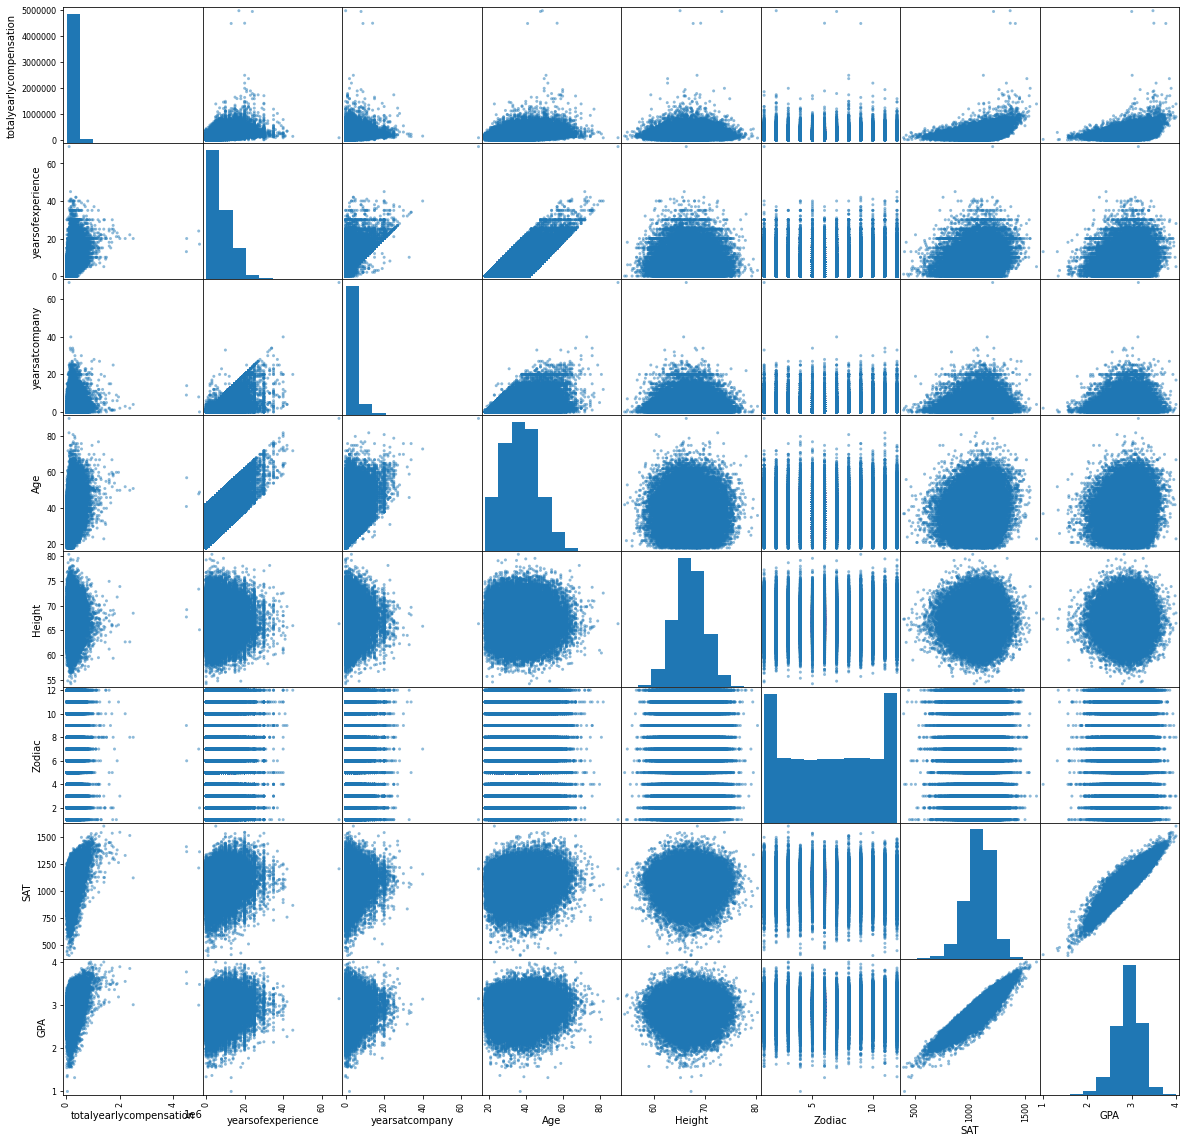

In [ ]:
pd.plotting.scatter_matrix(df[['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'Age',
 'Height',
 'Zodiac',
 'SAT',
 'GPA']],figsize  = [20, 20])

In [ ]:
# zodiac is also a categorical data in essense, also don't need to include in our prediction models
df.Zodiac.value_counts()

12    5323
8     5260
2     5259
3     5255
9     5239
1     5239
6     5210
4     5194
11    5194
10    5181
7     5153
5     5135
Name: Zodiac, dtype: int64

Here we examined the predictive power of variable Zodiac, and the scatter matrix showed that for all other variables, Zodiac follow a uniform distribution. Including zodiac into our models would not improve their predictive power. Thus it is not adopted.

In [ ]:
#training model
model = LinearRegression().fit(xTrain,yTrain)
rSqr = model.score(xTrain,yTrain)
print(rSqr)

0.2647163800499024


In [ ]:
#beta for each predictor
model.coef_

array([ 9791.56750546, -2792.01065941,   -78.25026802,   -33.95503948,
         340.4773652 ,  -401.60644337])

In [ ]:
# comparing multiple linear regression model performance to single best predictor performance
model_exp = LinearRegression().fit(xTrain.yearsofexperience.values.reshape(-1,1),yTrain)
rSqr_exp = model_exp.score(xTrain.yearsofexperience.values.reshape(-1,1),yTrain)
print('R^2 for multiple linear regression: ', rSqr.round(3))
print('R^2 for only years of experience: ', rSqr_exp.round(3))

R^2 for multiple linear regression:  0.265
R^2 for only years of experience:  0.177


**Answer:**
 
For our multiple linear regression model, all qualitative variables are removed, including encoded qualitative variables (since binary predictor variables are not suitable in linear regression, and they will not add much predictive power to our model). Then doing a test-train split with 80% of dataset being the test set. The multiple linear regression performed indicated a R^2 of 0.265, meaning that 26.5% of variance in the outcome is accounted for by the multiple linear regression model. Looking at all the coefficients of predictive variables, we see that $β_{experience}$ has the greatest magnitude of 10336.88, making it the best predictor out of the quantitative predictors. 

Then building a linear regression model using only years of experience to predict the total annual compensation, the R^2 for this linear regression model is 0.177, meaning that 17.7% of variance in the outcome is accounted for by the linear regression model using only years of experience as predictive variable. The multiple linear regression indeed have a higher R^2 than only years of experience as predictor variable.

Looking at the scatter matrix, however, there is certain underlying issues with the multiple linear regression model. There are predictor variables that are highly correlated, for instance, age and years of experience, GPA and SAT. Such collinearity in predictor variables would cause the multiple linear regression model to allocate the beta between collinear variables in an unpredictive way. The distribution total annual compensation, years of experience, age, and years at company is right skewed, which would not satisfy the assumption of linear regression.

# 2. Using ridge regression to do the same as in 1): How does the model change or improve compared to OLS? What is the optimal lambda?

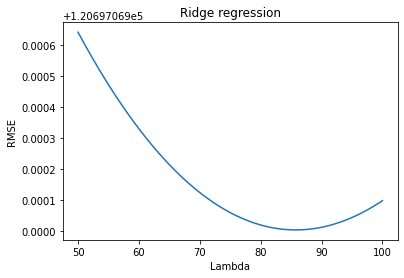

Optimal lambda: 85.80000000000001


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Init parameters:
lambdas = np.linspace(50,100,251)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [ ]:
ridgeModel = Ridge(alpha=85.8).fit(xTrain, yTrain)
#compare R^2
print('The R^2 for prior OLS model is {} and {} for ridge regression model'.format(rSqr.round(4),ridgeModel.score(xTrain, yTrain).round(4)))

predictions = model.predict(xTest)
predictions_ridge = ridgeModel.predict(xTest)
  
# RMSE evaluation
print('mean_squared_error for prior OLS model: ', mean_squared_error(yTest, predictions))
print('mean_squared_error for ridge regression model: ', mean_squared_error(yTest, predictions_ridge))

The R^2 for prior OLS model is 0.2647 and 0.2647 for ridge regression model
mean_squared_error for prior OLS model:  14567783417.135584
mean_squared_error for ridge regression model:  14567782466.173325


In [ ]:
#improvement over RMSE
mean_squared_error(yTest, predictions)-mean_squared_error(yTest, predictions_ridge)

950.9622592926025

In [ ]:
#change in beta
ridgeModel.coef_

array([ 9790.36460226, -2790.74620915,   -77.92686321,   -33.95200168,
         340.38100529,  -354.74298652])

For the implementation of ridge regression model, we first need to tune lambda for the minimal RMSE. We iterate thourgh a range of lambda values and graph out the change of RMSE. The optimal lambda is set at 71.8 with the minimum RMSE of $1.457*10^{10}$. Comparing it to the prior OLS model, we see that there is no significant change in R^2, but RMSE is decreased by 950.96.

# 3. Using Lasso regression to do the same as in 1): How does the model change now? How many of the predictor betas are shrunk to exactly 0? What is the optimal lambda now?

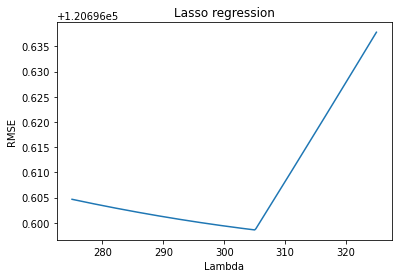

Optimal lambda: 305.0


In [ ]:
import warnings
warnings.filterwarnings('ignore') # Just to ignore warnings that might be thrown due to artifically formed data.

# Load libraries:
from sklearn.linear_model import Lasso

# Init parameters:
lambdas = np.linspace(275,325,251)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

In [ ]:
lassoModel = Lasso(alpha=305).fit(xTrain, yTrain)
#compare R^2
print('The R^2 for prior OLS model is {} and {} for lasso regression model'.format(rSqr.round(4),lassoModel.score(xTrain, yTrain).round(4)))

predictions = model.predict(xTest)
predictions_lasso = lassoModel.predict(xTest)
  
# RMSE evaluation
print('mean_squared_error for prior OLS model: ', mean_squared_error(yTest, predictions))
print('mean_squared_error for lasso regression model: ', mean_squared_error(yTest, predictions_lasso))

The R^2 for prior OLS model is 0.2647 and 0.2647 for lasso regression model
mean_squared_error for prior OLS model:  14567783417.135584
mean_squared_error for lasso regression model:  14567668910.266336


In [ ]:
#improvement in RMSE
mean_squared_error(yTest, predictions)-mean_squared_error(yTest, predictions_lasso)

114506.86924743652

In [ ]:
#change in beta
lassoModel.coef_

array([ 9.75546096e+03, -2.74079649e+03, -6.64024961e+01, -8.03557717e-03,
        3.39693588e+02, -0.00000000e+00])

Like the ridge regression model, we also need to tune for lambda to achieve a minimum RMSE with the model. Using the graph, we find that lambda of 521.4 would yield a model with minimum RMSE of $1.45676*10^{10}$. We are getting approximately the same R^2 value for the prior OLS model and the Lasso regression model, but again a smaller RMSE. Looking at the coefficient of predictor variables, however, we see that the predictor beta for variable GPA is shrinked to 0, as it is a property of Lasso regression: it shrinks the beta of predictor variable towards 0 as a result of the penalty term.

# 4. There is controversy as to the existence of a male/female gender pay gap in tech job compensation. Build a logistic regression model (with gender as the outcome variable) to see if there is an appreciable beta associated with total annual compensation with and without controlling for other factors.

In [ ]:
df.gender.value_counts()

Male                               35702
Female                              6999
Other                                400
Title: Senior Software Engineer        1
Name: gender, dtype: int64

In [ ]:
#endode gender for prediction model, others in gender is dropped since we could mainly focus on male and female
df_gen = df.copy().dropna(subset = ['gender'])
df_gen.gender.replace({'Male': 0, 'Female': 1}, inplace= True)
df_gen.drop(df[df.gender == 'Other'].index, inplace = True)
df_gen.drop(df[df.gender == 'Title: Senior Software Engineer'].index, inplace = True)
df_gen.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA,income_level
264,140000,4.0,4.0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,27,65.140,6,999,2.80,0
265,172000,12.0,2.0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,47,64.706,3,1122,3.09,0
266,325000,7.0,2.0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,28,69.016,7,1244,3.34,1
269,150000,4.0,0.0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,36,66.899,5,1114,3.02,0
270,640000,11.0,4.0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,49,65.522,12,1217,3.30,1


In [ ]:
list(df.columns)

['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'gender',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'Race',
 'Education',
 'Age',
 'Height',
 'Zodiac',
 'SAT',
 'GPA',
 'income_level']

In [ ]:
#test train split for variables
x_gen = df_gen[['totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Race_Asian',
 'Race_White',
 'Race_Black',
 'Race_Hispanic',
 'Age',
 'Height',
 'SAT',
 'GPA']]

y_gen = df_gen.gender.astype(int)

xTrain_gen, xTest_gen, yTrain_gen, yTest_gen = train_test_split(x_gen, y_gen, test_size=0.2, random_state=0)

In [ ]:
#logistic regression without controlling for other variables
logmodel = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced')
logmodel.fit(xTrain_gen, yTrain_gen);

pred = logmodel.predict(xTest_gen)

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(yTest_gen, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(yTest_gen, pred)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(yTest_gen, pred)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(yTest_gen, pred)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 53.5%
Confusion matrix = 
[[3747 3379]
 [ 593  822]]
Precision = 19.6%
Recall    = 58.1%


In [ ]:
#logistic regression controlling for other variables
logmodel = LogisticRegression(solver = 'newton-cg', class_weight = 'balanced')
logmodel.fit(xTrain_gen.totalyearlycompensation.values.reshape(-1,1), yTrain_gen);

pred = logmodel.predict(xTest_gen.totalyearlycompensation.values.reshape(-1,1))

# See the percentage of examples that are correctly classified.
accuracy = metrics.accuracy_score(yTest_gen, pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

# The matrix of predictions and true values for each class.
conf_matrix = metrics.confusion_matrix(yTest_gen, pred)
print("Confusion matrix = ")
print(conf_matrix)

# Precision score.
precision = metrics.precision_score(yTest_gen, pred)
print("Precision = {:0.1f}%".format(100 * precision))

# Recall score.
recall = metrics.recall_score(yTest_gen, pred)
print("Recall    = {:0.1f}%".format(100 * recall))

Accuracy = 47.0%
Confusion matrix = 
[[3098 4028]
 [ 496  919]]
Precision = 18.6%
Recall    = 64.9%


Since our analysis only pertains to male and female, category "Others" would be dropped from our dataset. There are only 400 out of 62642 of our original dataset, so not much of statistical power lost from dropping these entries. The Nan values in gender would be dropped for necessary analysis. 

Then we apply logistic regression models with and without controlling for other variables. We used newton-cg solver and balanced class weight. The overall performance of both models are not great. The logistic regression model without controlling other variables have a accuracy of 53.5%, precision score of 19.6%, and a recall score of 58.1%. The logistic regression model controlling other variables have a accuracy of 47.0%, precision score of 18.6%, and a recall score of 64.9%. The accuracy of logictic regression model controlling for other variables are below 0.5, meaning that it is worse than a random guess mostly on account of the bias exist in the data. 

The precision scores for both models are small, as we can also see in the confusion matrix that there is significantly more false positive case in both model's predictions. 

# 5. Build a logistic regression model to see if you can predict high and low pay from years of relevant experience, age, height, SAT score and GPA, respectively.

In [ ]:
#test train split
x_log = df[['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']]

y_log = df.income_level

xTrain_log, xTest_log, yTrain_log, yTest_log = train_test_split(x_log, y_log, test_size=0.2, random_state=0)

In [ ]:
x_column = ['yearsofexperience', 'Age', 'Height', 'SAT', 'GPA']
logmodel = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')

for i in x_column:
  logmodel.fit(xTrain_log[i].values.reshape(-1,1),yTrain_log);

  pred = logmodel.predict(xTest_log[i].values.reshape(-1,1))

  # See the percentage of examples that are correctly classified.
  accuracy = metrics.accuracy_score(yTest_log, pred) 
  print("Accuracy for predictor {} = {:0.1f}%".format(i,accuracy * 100))

  # The matrix of predictions and true values for each class.
  conf_matrix = metrics.confusion_matrix(yTest_log, pred)
  print("Confusion matrix = ")
  print(conf_matrix)

  # Precision score.
  precision = metrics.precision_score(yTest_log, pred)
  print("Precision = {:0.1f}%".format(100 * precision))

  # Recall score.
  recall = metrics.recall_score(yTest_log, pred)
  print("Recall    = {:0.1f}%".format(100 * recall))

  print()

Accuracy for predictor yearsofexperience = 66.1%
Confusion matrix = 
[[4419 1814]
 [2429 3867]]
Precision = 68.1%
Recall    = 61.4%

Accuracy for predictor Age = 58.1%
Confusion matrix = 
[[3698 2535]
 [2718 3578]]
Precision = 58.5%
Recall    = 56.8%

Accuracy for predictor Height = 50.4%
Confusion matrix = 
[[3117 3116]
 [3102 3194]]
Precision = 50.6%
Recall    = 50.7%

Accuracy for predictor SAT = 59.5%
Confusion matrix = 
[[3452 2781]
 [2293 4003]]
Precision = 59.0%
Recall    = 63.6%

Accuracy for predictor GPA = 59.1%
Confusion matrix = 
[[3475 2758]
 [2366 3930]]
Precision = 58.8%
Recall    = 62.4%



For variables years of relevant experience, age, height, SAT score and GPA, we build logistic regression with liblinear solver and balanced weight respectively. The result of our logistic regression is shown above. The predictor years of experience have the highest accuracy, precision score, and recall score among all others. Height among all predictors have the lowest accuracy, precision score, and recall score (almost as accurate as random guess).

# Extra credit: 

# a. Is salary, height or age normally distributed? Does this surprise you? Why or why not?

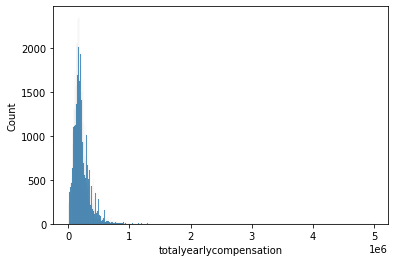

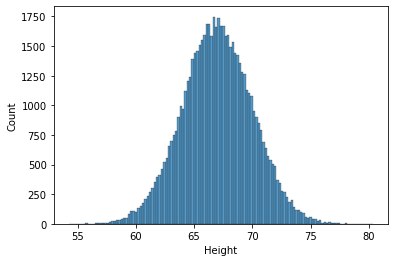

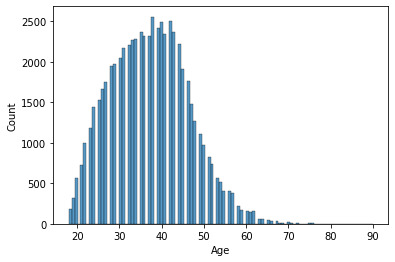

In [ ]:
#plot for eac distribution
for i in ['totalyearlycompensation', 'Height', 'Age']:
  sns.histplot(data=df, x = i)
  plt.show()

Looking at the distribution of salary, height, and age, we see that clearly height follows a normal distribution, while salary and age is right skewed. The result of distributions is not surprising. Age and salary are  intuitively right skewed as the tech industry are very much comprised of young employees, and thus most employees' wage are not very high. Labor force are rather accurately reflected in the distribution, as the most of employees with age around 30-45. Salary, on the other hand, is affected by outliers with very high wages (maybe CEO). Height is not affected by other variables and thus follow a normal distribution.

# b. Tell us something interesting about this dataset that is not already covered by the questions above and that is not obvious?

In [ ]:
#top 5 occuring location
df_raw['location'].value_counts().nlargest(5)

Seattle, WA          8701
San Francisco, CA    6797
New York, NY         4562
Redmond, WA          2649
Mountain View, CA    2275
Name: location, dtype: int64

In [ ]:
#top 5 occuring company
df_raw['company'].value_counts().nlargest(5)

Amazon       8126
Microsoft    5216
Google       4330
Facebook     2990
Apple        2028
Name: company, dtype: int64

In [ ]:
df_cat = df_raw[['company',	'title',	'location',	'totalyearlycompensation']]
df_cat.head()

,company,title,location,totalyearlycompensation
0,Oracle,Product Manager,"Redwood City, CA",127000
1,eBay,Software Engineer,"San Francisco, CA",100000
2,Amazon,Product Manager,"Seattle, WA",310000
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000
4,Microsoft,Software Engineer,"Mountain View, CA",157000


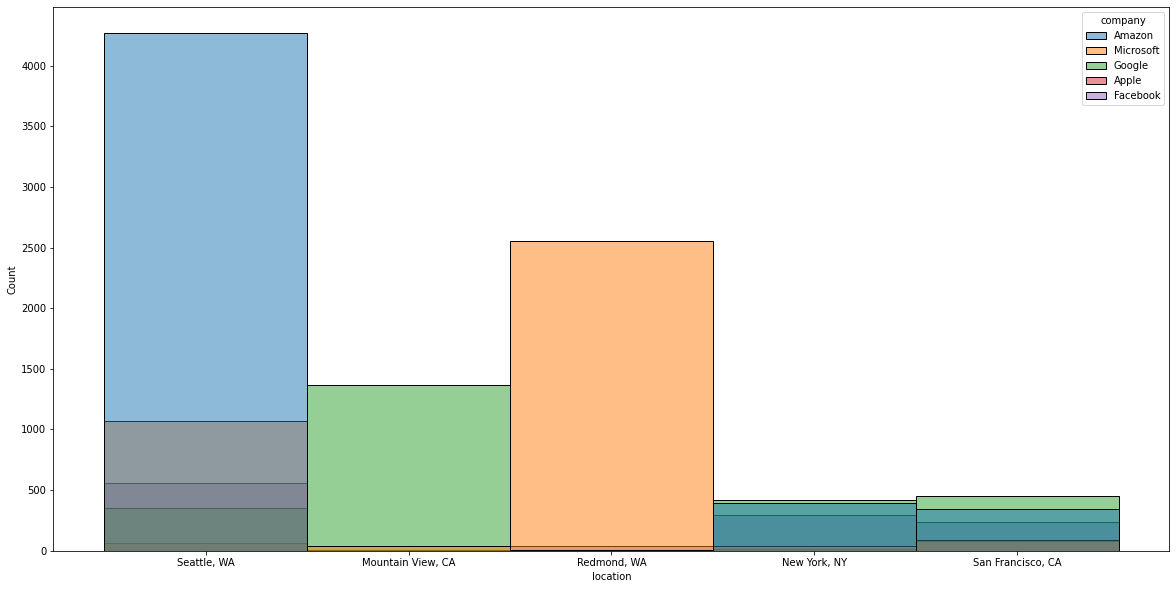

In [ ]:
#histogram of company and locaiton
df_test = df_cat.loc[(df_cat.company.isin(['Amazon', 'Microsoft', 'Google', 'Facebook', 'Apple'])) &
           (df_cat.location.isin(["Seattle, WA", "San Francisco, CA", "New York, NY", "Redmond, WA", "Mountain View, CA"]))]


fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data = df_test, x = 'location', hue = 'company')
plt.show()

For variables company and location that are not used by our prediciton models, I selected out the top 5 most occuring locations and companies. The top 5 most occuring companies are Amazon, Microsoft, Google, Facebook, and Apple. The top 5 most occuring locations are Seattle, WA; San Francisco, CA; New York, NY; Redmond, WA; and Moundtain View, CA. Graphing out a histogram of location with employees at each location distinguished by company, we can observe the settlement of each company. We see that most of Amazon employees are located in Seattle, Google employees mostly are located in Mountain View, most Microsoft employees are located in Redmond. And each company have relatively even distribution of employees in New York and San Francisco.